* ### Uploaded the file on google colab

In [1]:
from google.colab import files
upload_file=files.upload()

Saving weather.xlsx to weather.xlsx



* ### I have imported two libraries Pandas for read data and Numpy for mathmatics calculation.  
* ### Read file  by the Python pandas library

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('weather.xlsx', header=2)
df.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,‡,-3.0,NaN,-7.6,NaN,-5.3,...,1.8,NaN,1.8,NaN,0.0,NaN,22.0,NaN,63,NaN
1,2015-01-02,2015,1,2,‡,-3.4,NaN,-14.2,NaN,-8.8,...,0.0,T,0.0,T,1.0,NaN,27.0,NaN,50,NaN
2,2015-01-03,2015,1,3,‡,-8.5,NaN,-17.7,NaN,-13.1,...,17.0,NaN,17.0,NaN,1.0,NaN,3.0,NaN,41,NaN
3,2015-01-04,2015,1,4,‡,3.0,NaN,-8.6,NaN,-2.8,...,0.4,NaN,27.2,NaN,8.0,NaN,26.0,NaN,69,NaN
4,2015-01-05,2015,1,5,‡,-5.3,NaN,-17.9,NaN,-11.6,...,0.0,T,0.0,T,6.0,NaN,27.0,NaN,74,NaN


* ### Checked the size of file rows and columns size , this file have 365 rows and 27 columns.

In [3]:
df.shape

(365, 27)

* ### Check all columns information as how much data have indivudal columns null values and non-null values



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date/Time                  365 non-null    datetime64[ns]
 1   Year                       365 non-null    int64         
 2   Month                      365 non-null    int64         
 3   Day                        365 non-null    int64         
 4   Data Quality               365 non-null    object        
 5   Max Temp (°C)              365 non-null    float64       
 6   Max Temp Flag              0 non-null      float64       
 7   Min Temp (°C)              365 non-null    float64       
 8   Min Temp Flag              1 non-null      object        
 9   Mean Temp (°C)             365 non-null    float64       
 10  Mean Temp Flag             1 non-null      object        
 11  Heat Deg Days (°C)         365 non-null    float64       
 12  Heat Deg

* ### Above we are looking that some columns have one value only and  some have no values so this type columns is not importent for model.
* ### I have checked data quality columns have what type values.


In [5]:
df['Data Quality'].value_counts()

‡    365
Name: Data Quality, dtype: int64

* ### I am going to drop some columns which are not import because some one value and no value in whole columns, I have droped data , time , day becasue data already have another date/time columns.

In [6]:
df.drop(['Year','Month','Day','Data Quality','Max Temp Flag','Min Temp Flag','Mean Temp Flag','Heat Deg Days Flag','Cool Deg Days Flag','Snow on Grnd Flag','Dir of Max Gust Flag','Spd of Max Gust Flag'], axis=1, inplace=True)


* ### Read the data

In [7]:
df.head()

,Date/Time,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
0,2015-01-01,-3.0,-7.6,-5.3,23.3,0.0,0.0,NaN,1.8,NaN,1.8,NaN,0.0,22.0,63
1,2015-01-02,-3.4,-14.2,-8.8,26.8,0.0,0.0,NaN,0.0,T,0.0,T,1.0,27.0,50
2,2015-01-03,-8.5,-17.7,-13.1,31.1,0.0,0.0,NaN,17.0,NaN,17.0,NaN,1.0,3.0,41
3,2015-01-04,3.0,-8.6,-2.8,20.8,0.0,26.8,NaN,0.4,NaN,27.2,NaN,8.0,26.0,69
4,2015-01-05,-5.3,-17.9,-11.6,29.6,0.0,0.0,NaN,0.0,T,0.0,T,6.0,27.0,74


* ### Above able to see another some nan value some T and M value those are meanning less, So try check these colums values

In [8]:
df['Total Rain Flag'].value_counts()

T    30
M    13
Name: Total Rain Flag, dtype: int64

In [9]:
df['Total Snow Flag'].value_counts()

T    29
M     4
Name: Total Snow Flag, dtype: int64

In [10]:
df['Total Precip Flag'].value_counts()

T    53
M    10
Name: Total Precip Flag, dtype: int64

* ### I have droped some colums becasue these don't have meaningful data as we have seen above

In [11]:
df1=df
df1.drop(['Total Rain Flag','Total Snow Flag','Total Precip Flag'], axis=1, inplace=True)


* #### Again read the data

In [12]:
df1.head()

,Date/Time,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
0,2015-01-01,-3.0,-7.6,-5.3,23.3,0.0,0.0,1.8,1.8,0.0,22.0,63
1,2015-01-02,-3.4,-14.2,-8.8,26.8,0.0,0.0,0.0,0.0,1.0,27.0,50
2,2015-01-03,-8.5,-17.7,-13.1,31.1,0.0,0.0,17.0,17.0,1.0,3.0,41
3,2015-01-04,3.0,-8.6,-2.8,20.8,0.0,26.8,0.4,27.2,8.0,26.0,69
4,2015-01-05,-5.3,-17.9,-11.6,29.6,0.0,0.0,0.0,0.0,6.0,27.0,74


* ### for cheking the size of df1 data that have now only 12 columns these have are important for model

In [13]:
df1.shape

(365, 12)

* ### Check to detail columns, We are looking five columna have some missing values

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date/Time                  365 non-null    datetime64[ns]
 1   Max Temp (°C)              365 non-null    float64       
 2   Min Temp (°C)              365 non-null    float64       
 3   Mean Temp (°C)             365 non-null    float64       
 4   Heat Deg Days (°C)         365 non-null    float64       
 5   Cool Deg Days (°C)         365 non-null    float64       
 6   Total Rain (mm)            352 non-null    float64       
 7   Total Snow (cm)            361 non-null    float64       
 8   Total Precip (mm)          355 non-null    float64       
 9   Snow on Grnd (cm)          109 non-null    float64       
 10  Dir of Max Gust (10s deg)  283 non-null    float64       
 11  Spd of Max Gust (km/h)     364 non-null    object        
dtypes: datet

* ### fill the values in na place  by the mean of their columns

In [15]:
df2=df1
df2.fillna(df1[['Total Rain (mm)','Total Snow (cm)','Total Precip (mm)','Snow on Grnd (cm)','Dir of Max Gust (10s deg)']].mean(), inplace = True)

* ### Again I have checked the columns and I have got columns did not fill value becasue that columns have different data type so we have to change data type of columns

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date/Time                  365 non-null    datetime64[ns]
 1   Max Temp (°C)              365 non-null    float64       
 2   Min Temp (°C)              365 non-null    float64       
 3   Mean Temp (°C)             365 non-null    float64       
 4   Heat Deg Days (°C)         365 non-null    float64       
 5   Cool Deg Days (°C)         365 non-null    float64       
 6   Total Rain (mm)            365 non-null    float64       
 7   Total Snow (cm)            365 non-null    float64       
 8   Total Precip (mm)          365 non-null    float64       
 9   Snow on Grnd (cm)          365 non-null    float64       
 10  Dir of Max Gust (10s deg)  365 non-null    float64       
 11  Spd of Max Gust (km/h)     364 non-null    object        
dtypes: datet

* ### change the columns data type of 'spd of max gust' column.

In [17]:
df2['Spd of Max Gust (km/h)'] = pd.to_numeric(df2['Spd of Max Gust (km/h)'], errors="coerce", downcast="float")

* ### Again  check the data type of columns now column data type is changed

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date/Time                  365 non-null    datetime64[ns]
 1   Max Temp (°C)              365 non-null    float64       
 2   Min Temp (°C)              365 non-null    float64       
 3   Mean Temp (°C)             365 non-null    float64       
 4   Heat Deg Days (°C)         365 non-null    float64       
 5   Cool Deg Days (°C)         365 non-null    float64       
 6   Total Rain (mm)            365 non-null    float64       
 7   Total Snow (cm)            365 non-null    float64       
 8   Total Precip (mm)          365 non-null    float64       
 9   Snow on Grnd (cm)          365 non-null    float64       
 10  Dir of Max Gust (10s deg)  365 non-null    float64       
 11  Spd of Max Gust (km/h)     283 non-null    float32       
dtypes: datet

* ### Again fill the value through column mean of their column values

In [19]:
df2.fillna(df2['Spd of Max Gust (km/h)'].mean(), inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date/Time                  365 non-null    datetime64[ns]
 1   Max Temp (°C)              365 non-null    float64       
 2   Min Temp (°C)              365 non-null    float64       
 3   Mean Temp (°C)             365 non-null    float64       
 4   Heat Deg Days (°C)         365 non-null    float64       
 5   Cool Deg Days (°C)         365 non-null    float64       
 6   Total Rain (mm)            365 non-null    float64       
 7   Total Snow (cm)            365 non-null    float64       
 8   Total Precip (mm)          365 non-null    float64       
 9   Snow on Grnd (cm)          365 non-null    float64       
 10  Dir of Max Gust (10s deg)  365 non-null    float64       
 11  Spd of Max Gust (km/h)     365 non-null    float32       
dtypes: datet

* ### Take 319 rows from whole data and save this in weather variable , i am taking 319 rows because target data have only 319 rows

In [20]:
weather=df2.head(319)
weather

,Date/Time,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
0,2015-01-01,-3.0,-7.6,-5.3,23.3,0.0,0.000000,1.8,1.80000,0.000000,22.000000,63.000000
1,2015-01-02,-3.4,-14.2,-8.8,26.8,0.0,0.000000,0.0,0.00000,1.000000,27.000000,50.000000
2,2015-01-03,-8.5,-17.7,-13.1,31.1,0.0,0.000000,17.0,17.00000,1.000000,3.000000,41.000000
3,2015-01-04,3.0,-8.6,-2.8,20.8,0.0,26.800000,0.4,27.20000,8.000000,26.000000,69.000000
4,2015-01-05,-5.3,-17.9,-11.6,29.6,0.0,0.000000,0.0,0.00000,6.000000,27.000000,74.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
314,2015-11-11,10.8,4.0,7.4,10.6,0.0,0.200000,0.0,0.20000,9.559633,20.190813,46.226147
315,2015-11-12,11.9,6.3,9.1,8.9,0.0,15.600000,0.0,15.60000,9.559633,23.000000,63.000000
316,2015-11-13,9.4,0.9,5.2,12.8,0.0,2.464205,0.0,2.99831,9.559633,24.000000,48.000000
317,2015-11-14,4.1,-0.2,2.0,16.0,0.0,0.000000,0.0,0.00000,0.000000,26.000000,50.000000


* ### Upload  target data on google colab  

In [21]:
from google.colab import files
uploaded_file=files.upload()

Saving Checkpoint_count.xlsx to Checkpoint_count.xlsx


* ### Read target data by the help of pandas library

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

target_data = pd.read_excel('Checkpoint_count.xlsx')
target_data.head()

,Date,Time,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,...,check_point11,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20
0,2015-01-01 00:00:00,00:00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
1,2015-02-01 00:00:00,00:00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2,2015-03-01 00:00:00,00:00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
3,2015-04-01 00:00:00,00:00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
4,2015-05-01 00:00:00,00:00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10


* ### Understand the information about data with help data.info command

In [23]:
target_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           319 non-null    object 
 1   Time           319 non-null    object 
 2   check_point0   319 non-null    int64  
 3   check_point1   319 non-null    int64  
 4   check_point2   319 non-null    int64  
 5   check_point3   319 non-null    int64  
 6   check_point4   62 non-null     float64
 7   check_point5   319 non-null    int64  
 8   check_point6   319 non-null    int64  
 9   check_point7   319 non-null    int64  
 10  check_point8   319 non-null    int64  
 11  check_point9   52 non-null     float64
 12  check_point10  319 non-null    int64  
 13  check_point11  209 non-null    float64
 14  check_point12  319 non-null    int64  
 15  check_point13  319 non-null    int64  
 16  check_point14  319 non-null    int64  
 17  check_point15  319 non-null    int64  
 18  check_poin

* ### Check target data size this

In [24]:
target_data.shape

(319, 23)

* ### fill the all na values by zero

In [25]:
target_data.fillna(0,inplace=True)

In [26]:
target_data1 =target_data

* ### Add all values and make new column 'sum_check_point' because we want perday , monthly yearly booked cycles in usa depeding on weather situaction




In [27]:
target_data1['sum_check_point']= target_data1.sum(axis=1)
target_data1.head()

<ipython-input-27-a73e1ea36086>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  target_data1['sum_check_point']= target_data1.sum(axis=1)


,Date,Time,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,...,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20,sum_check_point
0,2015-01-01 00:00:00,00:00:00,58,12,4,17,33.0,49,21,16,...,58,91,24,3,0.0,17,78,21,6,531.0
1,2015-02-01 00:00:00,00:00:00,75,7,5,15,30.0,113,27,9,...,109,177,32,13,0.0,11,57,77,4,804.0
2,2015-03-01 00:00:00,00:00:00,79,7,3,7,30.0,107,36,12,...,71,131,33,5,0.0,14,174,40,5,774.0
3,2015-04-01 00:00:00,00:00:00,10,1,21,0,10.0,35,29,1,...,6,11,6,1,0.0,1,20,6,0,158.0
4,2015-05-01 00:00:00,00:00:00,42,0,2,0,27.0,90,21,1,...,0,5,49,20,0.0,0,41,56,10,371.0


* ### I have summarized all values in a single column

In [28]:
target_data1['sum_check_point']

0        531.0
1        804.0
2        774.0
3        158.0
4        371.0
        ...   
314    40940.0
315    24175.0
316    23331.0
317    13298.0
318    13598.0
Name: sum_check_point, Length: 319, dtype: float64

* ### To check data is stationary or non stationary
* ###  we are able to understatnd that data is non stationary

<Axes: >

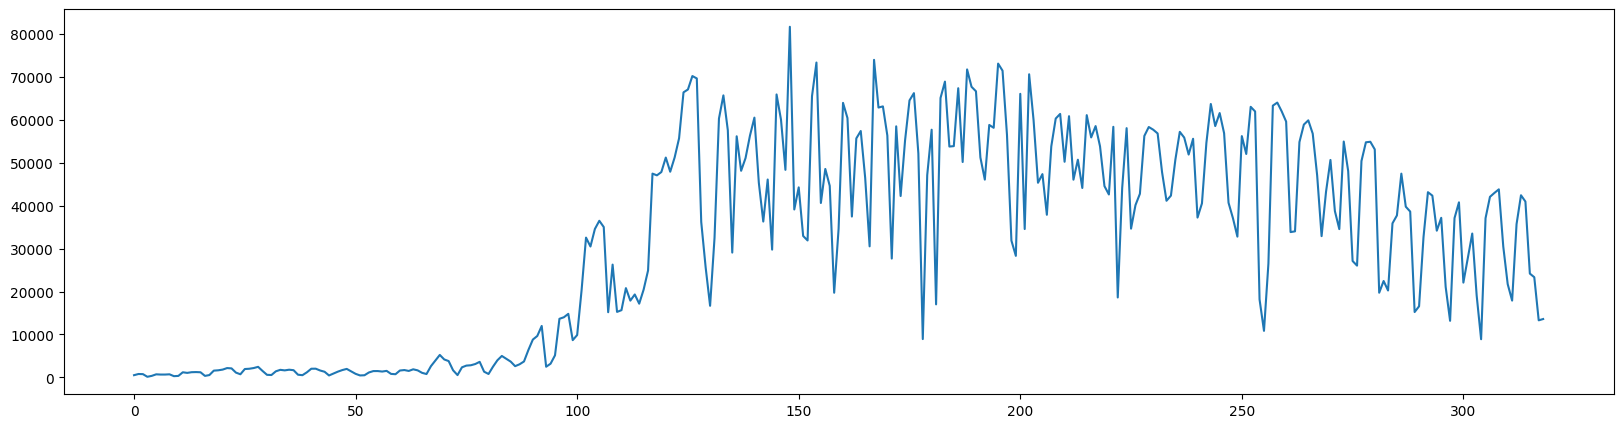

In [29]:
plt.figure(figsize=(20,5))
target_data1['sum_check_point'].plot()

* ### Check by the help hypothesis testing data is statstic or non statstic
* ### we are looking that the data is non stationary

In [31]:

import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Ho: it is non stationary
# H1: it is stationary

def test(check_point):
  result =adfuller(check_point)
  labels= ['adf test statics','p_value','lags used','nuumber of observation used']
  for value, label in zip(result,labels):
    print(label+':'+str(value))
  if result[1]<=0.05:
    print('statinary')
  else:
    print('non statinary')

test(target_data1['sum_check_point'])




adf test statics:-1.4853734227766706
p_value:0.5407340910735435
lags used:16
nuumber of observation used:302
non statinary


* ### I have saved all values in a variable

In [32]:
sum_check_point = target_data1['sum_check_point']
sum_check_point

0        531.0
1        804.0
2        774.0
3        158.0
4        371.0
        ...   
314    40940.0
315    24175.0
316    23331.0
317    13298.0
318    13598.0
Name: sum_check_point, Length: 319, dtype: float64

In [33]:
weather['sum_check_point'] = sum_check_point

<ipython-input-33-157c1b2b53f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['sum_check_point'] = sum_check_point


* ### Add the target column with weather data

In [34]:
weather_check_point=weather
weather_check_point

,Date/Time,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),sum_check_point
0,2015-01-01,-3.0,-7.6,-5.3,23.3,0.0,0.000000,1.8,1.80000,0.000000,22.000000,63.000000,531.0
1,2015-01-02,-3.4,-14.2,-8.8,26.8,0.0,0.000000,0.0,0.00000,1.000000,27.000000,50.000000,804.0
2,2015-01-03,-8.5,-17.7,-13.1,31.1,0.0,0.000000,17.0,17.00000,1.000000,3.000000,41.000000,774.0
3,2015-01-04,3.0,-8.6,-2.8,20.8,0.0,26.800000,0.4,27.20000,8.000000,26.000000,69.000000,158.0
4,2015-01-05,-5.3,-17.9,-11.6,29.6,0.0,0.000000,0.0,0.00000,6.000000,27.000000,74.000000,371.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2015-11-11,10.8,4.0,7.4,10.6,0.0,0.200000,0.0,0.20000,9.559633,20.190813,46.226147,40940.0
315,2015-11-12,11.9,6.3,9.1,8.9,0.0,15.600000,0.0,15.60000,9.559633,23.000000,63.000000,24175.0
316,2015-11-13,9.4,0.9,5.2,12.8,0.0,2.464205,0.0,2.99831,9.559633,24.000000,48.000000,23331.0
317,2015-11-14,4.1,-0.2,2.0,16.0,0.0,0.000000,0.0,0.00000,0.000000,26.000000,50.000000,13298.0


* ### Rename the columns name

In [35]:
weather_point= weather_check_point.rename({'Date/Time':'date_time','Max Temp (°C)':'max_temp','Min Temp (°C)':'min_temp','Mean Temp (°C)':'mean_temp',
                                           'Heat Deg Days (°C)':'heat_deg_days','Cool Deg Days (°C)':'cool_deg_days','Total Rain (mm)':'total_rain',
                                           'Total Snow (cm)':'total_snow','Total Precip (mm)':'total_precip','Snow on Grnd (cm)':'snow_on_grnd',
                                           'Dir of Max Gust (10s deg)':'dir_of_max_gust','Spd of Max Gust (km/h)':'spd_of_max_gust'},axis=1)
weather_point

,date_time,max_temp,min_temp,mean_temp,heat_deg_days,cool_deg_days,total_rain,total_snow,total_precip,snow_on_grnd,dir_of_max_gust,spd_of_max_gust,sum_check_point
0,2015-01-01,-3.0,-7.6,-5.3,23.3,0.0,0.000000,1.8,1.80000,0.000000,22.000000,63.000000,531.0
1,2015-01-02,-3.4,-14.2,-8.8,26.8,0.0,0.000000,0.0,0.00000,1.000000,27.000000,50.000000,804.0
2,2015-01-03,-8.5,-17.7,-13.1,31.1,0.0,0.000000,17.0,17.00000,1.000000,3.000000,41.000000,774.0
3,2015-01-04,3.0,-8.6,-2.8,20.8,0.0,26.800000,0.4,27.20000,8.000000,26.000000,69.000000,158.0
4,2015-01-05,-5.3,-17.9,-11.6,29.6,0.0,0.000000,0.0,0.00000,6.000000,27.000000,74.000000,371.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2015-11-11,10.8,4.0,7.4,10.6,0.0,0.200000,0.0,0.20000,9.559633,20.190813,46.226147,40940.0
315,2015-11-12,11.9,6.3,9.1,8.9,0.0,15.600000,0.0,15.60000,9.559633,23.000000,63.000000,24175.0
316,2015-11-13,9.4,0.9,5.2,12.8,0.0,2.464205,0.0,2.99831,9.559633,24.000000,48.000000,23331.0
317,2015-11-14,4.1,-0.2,2.0,16.0,0.0,0.000000,0.0,0.00000,0.000000,26.000000,50.000000,13298.0


* ### Features selection based on the target variable, By this command we can understand how much depend target variable on onter feattures.

In [36]:
weather_point.corr()

<ipython-input-36-462286718bd4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather_point.corr()


,max_temp,min_temp,mean_temp,heat_deg_days,cool_deg_days,total_rain,total_snow,total_precip,snow_on_grnd,dir_of_max_gust,spd_of_max_gust,sum_check_point
max_temp,1.000000,0.968844,0.992266,-0.984027,0.586494,0.191978,-0.376957,0.100924,-0.225116,0.117653,-0.084175,0.860055
min_temp,0.968844,1.000000,0.992090,-0.983480,0.588700,0.237257,-0.378993,0.144484,-0.244345,0.086177,-0.086867,0.824346
mean_temp,0.992266,0.992090,1.000000,-0.991548,0.591987,0.216337,-0.380936,0.123697,-0.236617,0.102814,-0.086058,0.848968
heat_deg_days,-0.984027,-0.983480,-0.991548,1.000000,-0.482419,-0.221324,0.389585,-0.126541,0.253614,-0.097768,0.085212,-0.849894
cool_deg_days,0.586494,0.588700,0.591987,-0.482419,1.000000,0.085735,-0.151782,0.049064,-0.022070,0.086810,-0.051682,0.452249
total_rain,0.191978,0.237257,0.216337,-0.221324,0.085735,1.000000,-0.089476,0.969702,-0.044944,-0.077775,0.114992,-0.047130
total_snow,-0.376957,-0.378993,-0.380936,0.389585,-0.151782,-0.089476,1.000000,0.150231,0.017872,-0.157209,0.057661,-0.352868
total_precip,0.100924,0.144484,0.123697,-0.126541,0.049064,0.969702,0.150231,1.000000,-0.048272,-0.114205,0.132155,-0.131060
snow_on_grnd,-0.225116,-0.244345,-0.236617,0.253614,-0.022070,-0.044944,0.017872,-0.048272,1.000000,-0.073799,-0.022861,-0.091429
dir_of_max_gust,0.117653,0.086177,0.102814,-0.097768,0.086810,-0.077775,-0.157209,-0.114205,-0.073799,1.000000,0.188986,0.078510


* ### Split the data for train and test

In [37]:
train = weather_point.head(300)
test = weather_point.tail(19)

In [38]:
train

,date_time,max_temp,min_temp,mean_temp,heat_deg_days,cool_deg_days,total_rain,total_snow,total_precip,snow_on_grnd,dir_of_max_gust,spd_of_max_gust,sum_check_point
0,2015-01-01,-3.0,-7.6,-5.3,23.3,0.0,0.0,1.8,1.8,0.000000,22.000000,63.000000,531.0
1,2015-01-02,-3.4,-14.2,-8.8,26.8,0.0,0.0,0.0,0.0,1.000000,27.000000,50.000000,804.0
2,2015-01-03,-8.5,-17.7,-13.1,31.1,0.0,0.0,17.0,17.0,1.000000,3.000000,41.000000,774.0
3,2015-01-04,3.0,-8.6,-2.8,20.8,0.0,26.8,0.4,27.2,8.000000,26.000000,69.000000,158.0
4,2015-01-05,-5.3,-17.9,-11.6,29.6,0.0,0.0,0.0,0.0,6.000000,27.000000,74.000000,371.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2015-10-23,8.2,-0.4,3.9,14.1,0.0,0.0,0.0,0.0,9.559633,34.000000,39.000000,37158.0
296,2015-10-24,10.2,0.3,5.3,12.7,0.0,9.0,0.0,9.0,9.559633,15.000000,56.000000,21090.0
297,2015-10-25,12.7,5.0,8.9,9.1,0.0,9.0,0.0,9.0,9.559633,28.000000,54.000000,13184.0
298,2015-10-26,7.2,-0.8,3.2,14.8,0.0,0.0,0.0,0.0,9.559633,26.000000,37.000000,37095.0


In [39]:
test.head()

,date_time,max_temp,min_temp,mean_temp,heat_deg_days,cool_deg_days,total_rain,total_snow,total_precip,snow_on_grnd,dir_of_max_gust,spd_of_max_gust,sum_check_point
300,2015-10-28,10.8,-0.3,5.3,12.7,0.0,31.2,0.0,31.2,9.559633,10.000000,48.000000,22079.0
301,2015-10-29,14.8,6.9,10.9,7.1,0.0,8.6,0.0,8.6,9.559633,23.000000,83.000000,27771.0
302,2015-10-30,8.4,-1.2,3.6,14.4,0.0,0.8,0.0,0.8,9.559633,24.000000,56.000000,33493.0
303,2015-10-31,8.1,-3.2,2.5,15.5,0.0,0.0,0.0,0.0,9.559633,20.190813,46.226147,19049.0
304,2015-11-01,12.9,5.5,9.2,8.8,0.0,6.2,0.0,6.2,9.559633,24.000000,70.000000,8896.0


* ### Remove target and date columns from test data and save  this test1 variable for prediction purpose

In [40]:
test1 = test.drop(['date_time','sum_check_point'] ,axis=1)
test1.head()


,max_temp,min_temp,mean_temp,heat_deg_days,cool_deg_days,total_rain,total_snow,total_precip,snow_on_grnd,dir_of_max_gust,spd_of_max_gust
300,10.8,-0.3,5.3,12.7,0.0,31.2,0.0,31.2,9.559633,10.000000,48.000000
301,14.8,6.9,10.9,7.1,0.0,8.6,0.0,8.6,9.559633,23.000000,83.000000
302,8.4,-1.2,3.6,14.4,0.0,0.8,0.0,0.8,9.559633,24.000000,56.000000
303,8.1,-3.2,2.5,15.5,0.0,0.0,0.0,0.0,9.559633,20.190813,46.226147
304,12.9,5.5,9.2,8.8,0.0,6.2,0.0,6.2,9.559633,24.000000,70.000000


Use python satasmodels library for statical accoroach and calculate prediction

In [41]:
import statsmodels.formula.api as smf
add_model = smf.ols('sum_check_point~max_temp+min_temp+mean_temp+heat_deg_days+cool_deg_days+total_rain+total_snow+total_precip+snow_on_grnd+dir_of_max_gust+spd_of_max_gust', data =train).fit()
predecction2= pd.Series(add_model.predict(test1))

rmse2 = np.sqrt(np.mean((np.array(test['sum_check_point'])-np.array(predecction2))**2))
rmse2


8965.295221582512

Above I am getting rmse(root square error) for know model accuracy

* ### Here I have used another hlotwinter method to calculate prediction and accuracy

In [42]:

from statsmodels.tsa.holtwinters import Holt                                      # Holts (Double) Exponential Smoothing


In [43]:
# Smp_model
Smp_model = Holt(train['sum_check_point']).fit(smoothing_level=0.90,smoothing_slope=0.10)
Smp_model

<ipython-input-43-f08fad94e906>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  Smp_model = Holt(train['sum_check_point']).fit(smoothing_level=0.90,smoothing_slope=0.10)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [44]:
predictk = Smp_model.predict(start = test.index[0], end = test.index[-1])
predictk

300    40869.333698
301    41585.709115
302    42302.084532
303    43018.459949
304    43734.835366
305    44451.210783
306    45167.586200
307    45883.961617
308    46600.337035
309    47316.712452
310    48033.087869
311    48749.463286
312    49465.838703
313    50182.214120
314    50898.589537
315    51614.964954
316    52331.340371
317    53047.715788
318    53764.091205
dtype: float64

In [45]:
M=np.array(test['sum_check_point'])-np.array(predictk)
M1=M**2
M2=np.mean(M1)
rmse= np.sqrt(M2)
rmse

22425.381582337654

* ### Here I have drawed two graph to understand p value and q value for arima model

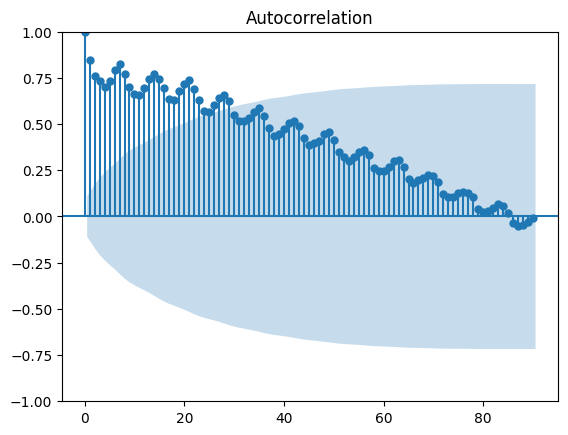

In [46]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(weather_point['sum_check_point'],lags=90)
plt.show()

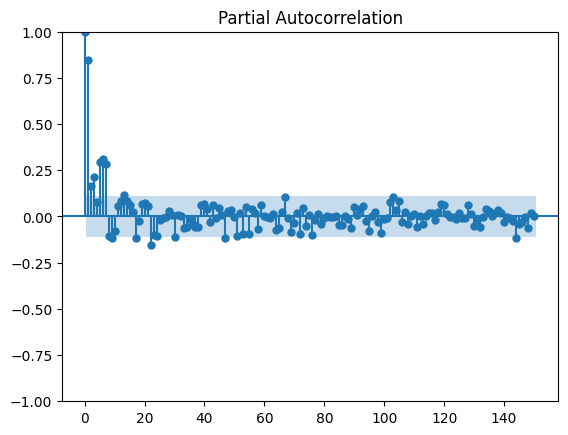

In [47]:
tsa_plots.plot_pacf(weather_point['sum_check_point'],lags=150)
plt.show()

* ### I have used here arima model and this is giving  good accuracy compare to above model

In [48]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults


X= train['sum_check_point'].values
X = X.astype('float32')
model = ARIMA(X, order=(20, 1, 6))
model_fit = model.fit()



forecast_values = model_fit.forecast(steps=19)  # n is the number of future time points to forecast

forecast_values

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([40244.57176883, 36205.43374176, 25977.87592491, 18295.22994502,
       18728.3326065 , 27777.72043961, 37764.00803093, 40298.99090119,
       34591.92753094, 23948.76041895, 16399.43652042, 19977.97712109,
       26655.21453992, 35466.66234777, 40978.56623902, 33545.21586053,
       23541.29997302, 16765.43120442, 18562.02883509])

In [49]:
x=np.array(test['sum_check_point'])-forecast_values
x=x**2
x=np.mean(x)
rmse = np.sqrt(x)

rmse

7540.910818279922